In [46]:
import sklearn
from sklearn.cluster import KMeans,MeanShift,AffinityPropagation
from sklearn.mixture import GaussianMixture
from ConstructDatatset import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from TotalCalculation import *
from preprocessing import *
from ClassPrediction import *

In [47]:
df = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\CSV_dataset_sobel')

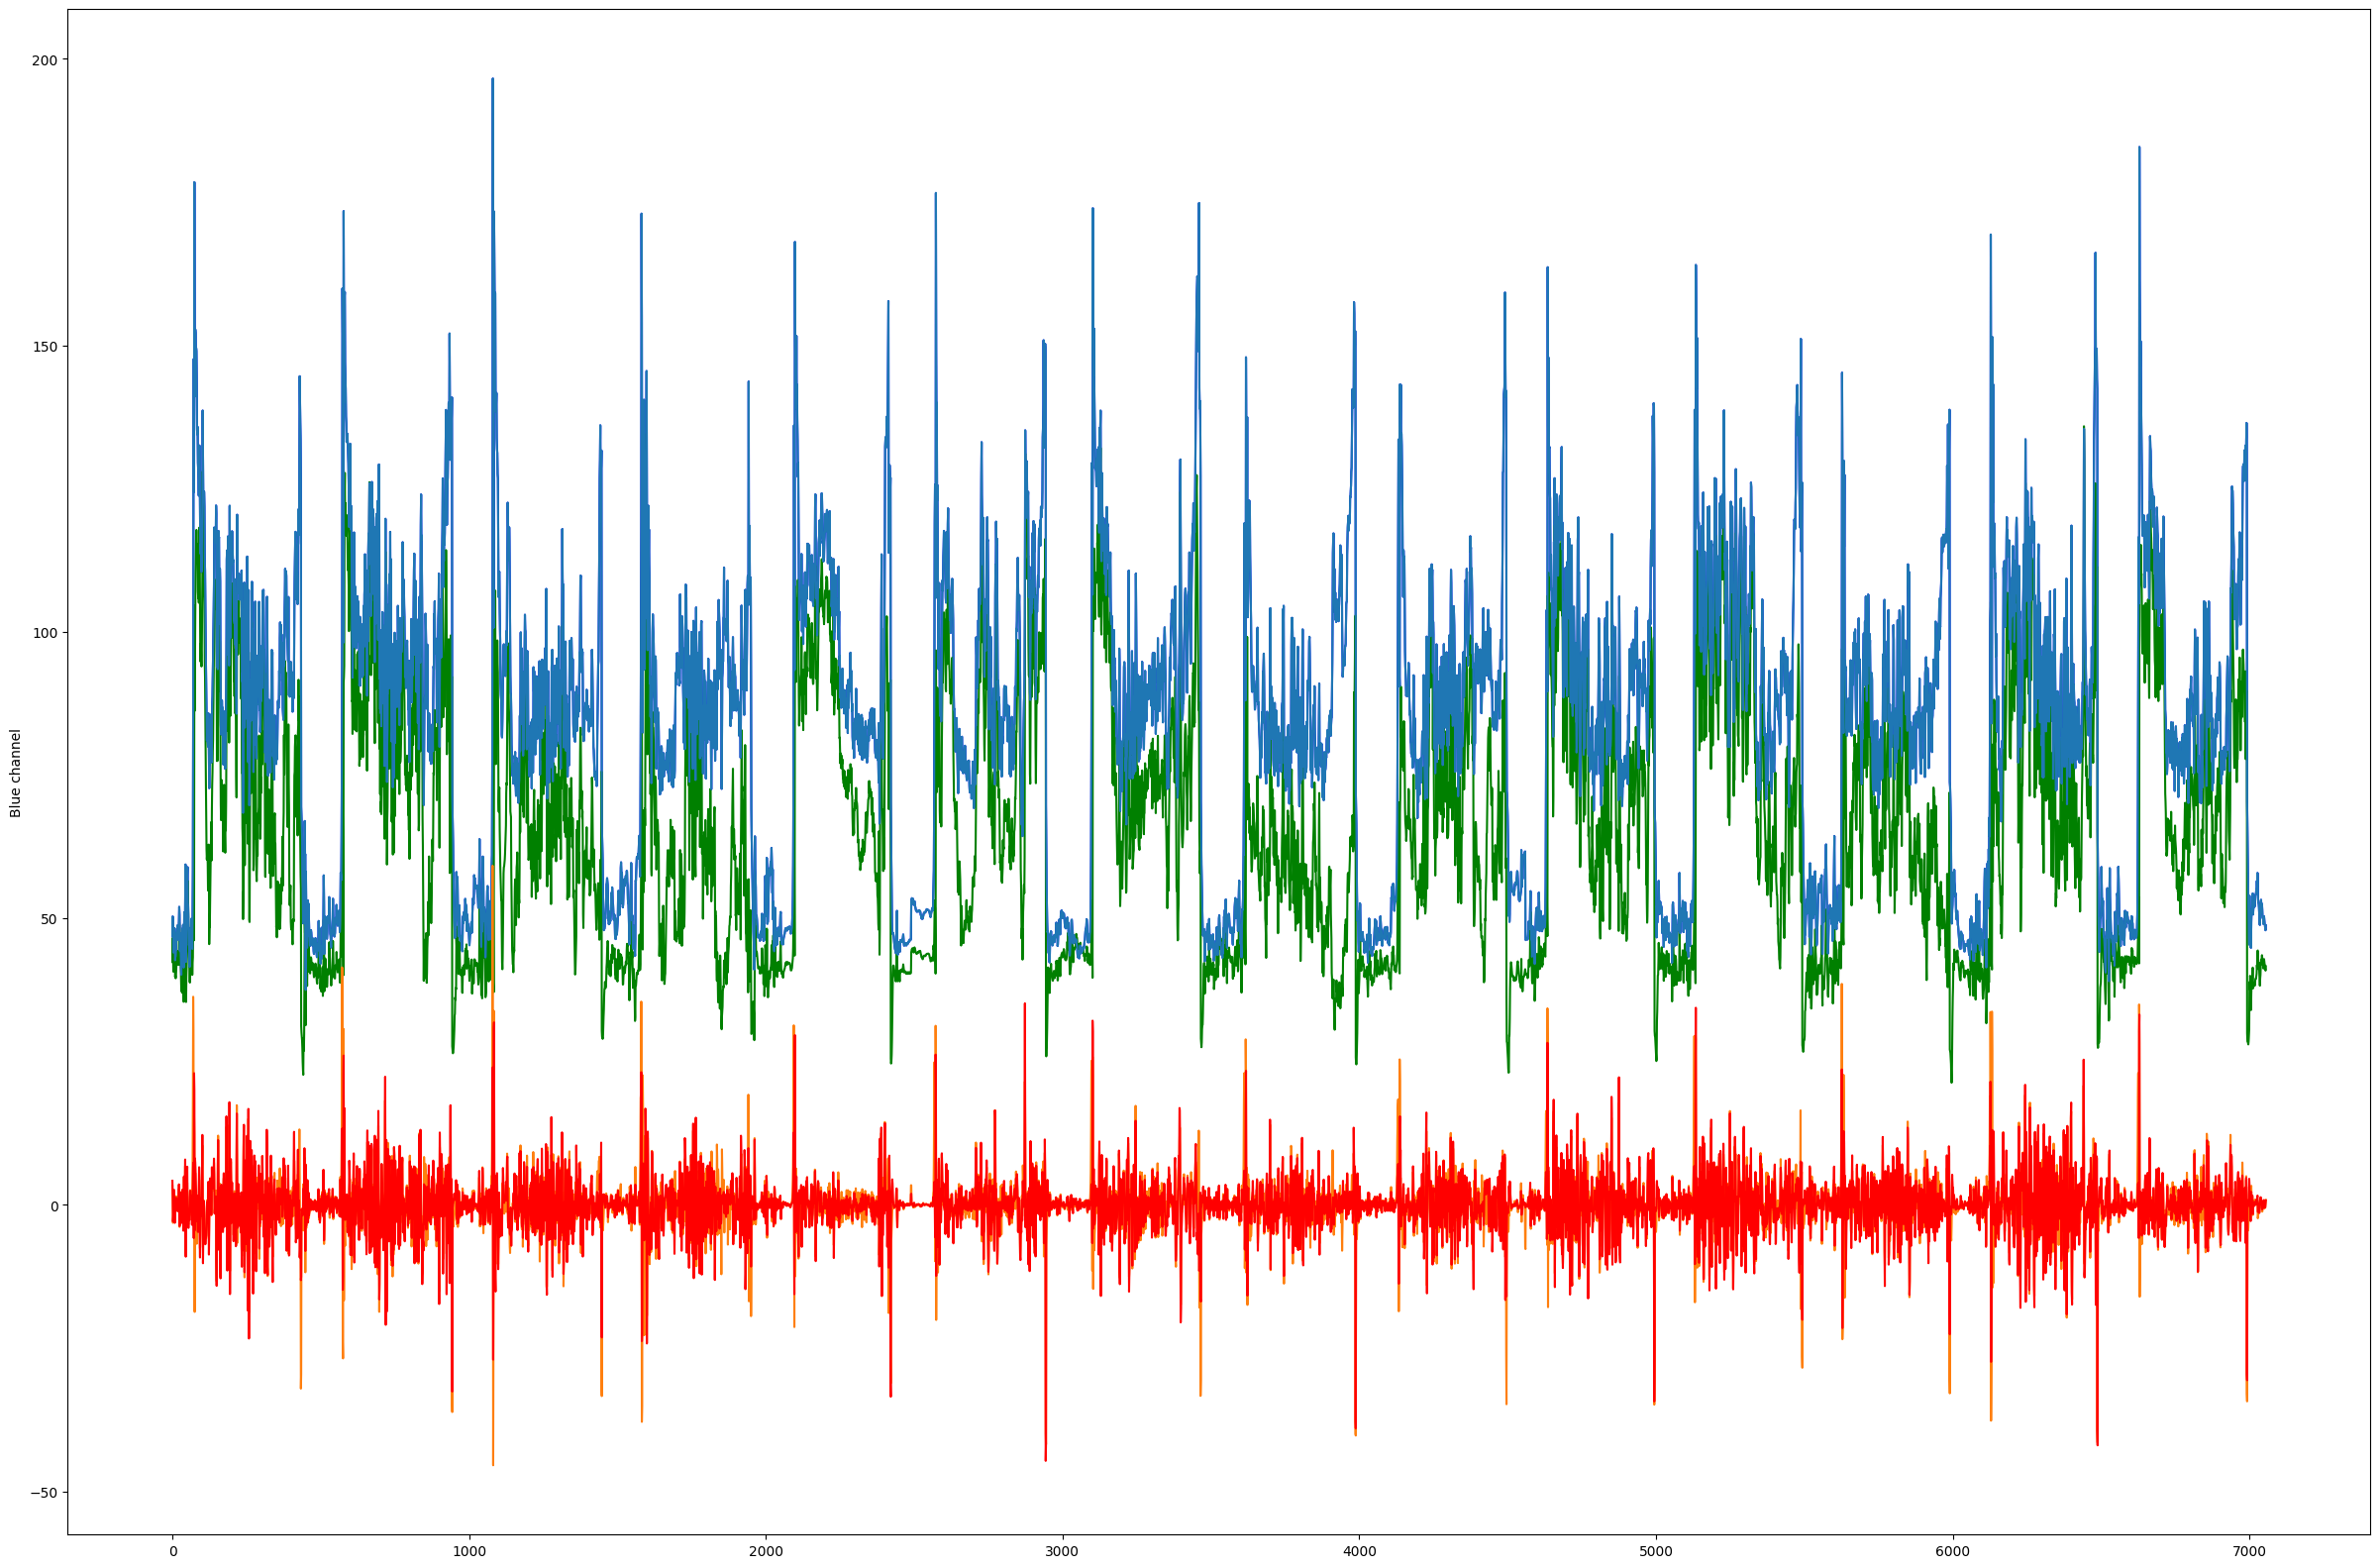

In [48]:
name_y = str('Blue channel')
name_x = np.arange(len(df))
dintr = np.gradient(df['Blue channel'])
dintb = np.gradient(df['Red channel'])

plt.figure(figsize=(30,20))
sns.lineplot(data=df,x=name_x,y=df[name_y],c='blue')
sns.lineplot(data=df,x=name_x,y=df['Red channel'],c='green')
sns.lineplot(data=df,x=name_x,y=df['intensity'])
plt.plot(dintr)
plt.plot(dintb,c='r')

In [49]:
date = []
for i in df.index.tolist():
    date.append(timeConvertion().ticks_to_datetime(i,time_zone=7))
df['Time'] = date


In [50]:
df

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,intensity,Red channel,Blue channel,Time
638537222329702969,217.963969,8.576062,0.320684,0.172815,0.232520,0.029865,46.991088,42.380517,46.991088,2024-06-12 00:03:52.970296
638537225030937312,233.442623,7.930505,0.417538,0.265997,0.154690,0.070754,50.320380,46.577063,50.320380,2024-06-12 00:08:23.093728
638537227831599912,231.083356,8.938164,0.322837,0.145395,0.249305,0.021140,48.530153,45.286644,48.530153,2024-06-12 00:13:03.159992
638537230532148867,224.824393,8.744272,0.325864,0.171758,0.237659,0.029501,44.024591,40.697024,44.024591,2024-06-12 00:17:33.214888
638537233232143019,262.416772,9.269330,0.307032,0.157326,0.284671,0.024751,44.451010,41.037190,44.451010,2024-06-12 00:22:03.214304
...,...,...,...,...,...,...,...,...,...,...
638535479097020744,182.720975,7.883675,0.336425,0.193402,0.331133,0.037404,49.040997,41.977511,49.040997,2024-06-09 23:38:29.702072
638535481797955279,175.504423,7.725847,0.338203,0.197026,0.322659,0.038819,48.821436,41.854389,48.821436,2024-06-09 23:42:59.795528
638535484498354587,197.470733,8.189082,0.337227,0.198871,0.279742,0.039550,48.218843,41.237167,48.218843,2024-06-09 23:47:29.835456
638535487198661841,207.653103,8.339126,0.339205,0.202822,0.276273,0.041137,47.916085,40.872375,47.916085,2024-06-09 23:51:59.866184


In [51]:
df['Time (decimal)'] = df['Time'].dt.hour+df['Time'].dt.minute/60

In [52]:
start_date = '2024-01-01'
end_date = str(df['Time'].tolist()[1])
location = [18.849417,98.9538]
days = timeConvertion().time_duration(start_date,end_date,include_end_date=True).days

LSTM = SunPosition.LSTM(time_zone_offset=7)
EoT = SunPosition.calculate_EoT(day=days)
TC = SunPosition.TimeCorrectionFactor(Longitude=location[1],LSTM=LSTM,EoT=EoT)
dec = SunPosition.declination(day=days)
suntime = SunPosition.DaytimeInfo(latitude=location[0],declination=dec,TC=TC)
sunrise,sunset = SunPosition.DaytimeInfo(latitude=location[0],declination=dec,TC=TC)

In [53]:
df = df[(df['Time (decimal)'] > sunrise) & (df['Time (decimal)'] < sunset)]

In [54]:
x = df.drop(columns=['Time (decimal)','Time','Red channel','Blue channel'])

dataset = list(x.itertuples(index=False,name=None))
dataset = np.array(dataset)

<Axes: >

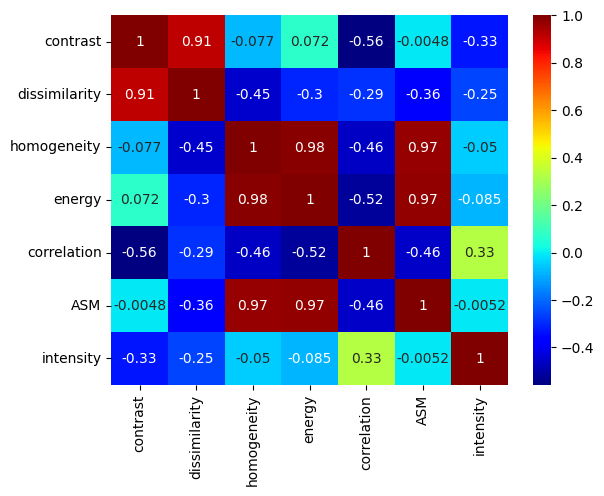

In [55]:
sns.heatmap(data=x.corr(),cmap='jet',annot=True)

In [56]:
from sklearn.metrics.pairwise import euclidean_distances
np.random.seed(42)

kmeans = KMeans(n_clusters=5, tol=1e-5, random_state=42, init='random' ,n_init=20, max_iter=500, algorithm='elkan')
#af = AffinityPropagation(damping=0.95, max_iter=500, convergence_iter=20, preference=-50, affinity='euclidean')
GMM = GaussianMixture(n_components=5, tol=1e-4, init_params='kmeans',covariance_type='full', max_iter=500, random_state=42, n_init=10)
labels = GMM.fit_predict(dataset)
labels_kmean = kmeans.fit_predict(dataset)
#labels_af = af.fit_predict(dataset)

In [57]:
df.loc[:, 'Label_GMM'] = labels
df.loc[:, 'Label_Kmean'] = labels_kmean
#df.loc[:, 'Label_AF'] = labels_af

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1712\2933432740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Label_GMM'] = labels
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1712\2933432740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Label_Kmean'] = labels_kmean


<Axes: xlabel='dissimilarity', ylabel='contrast'>

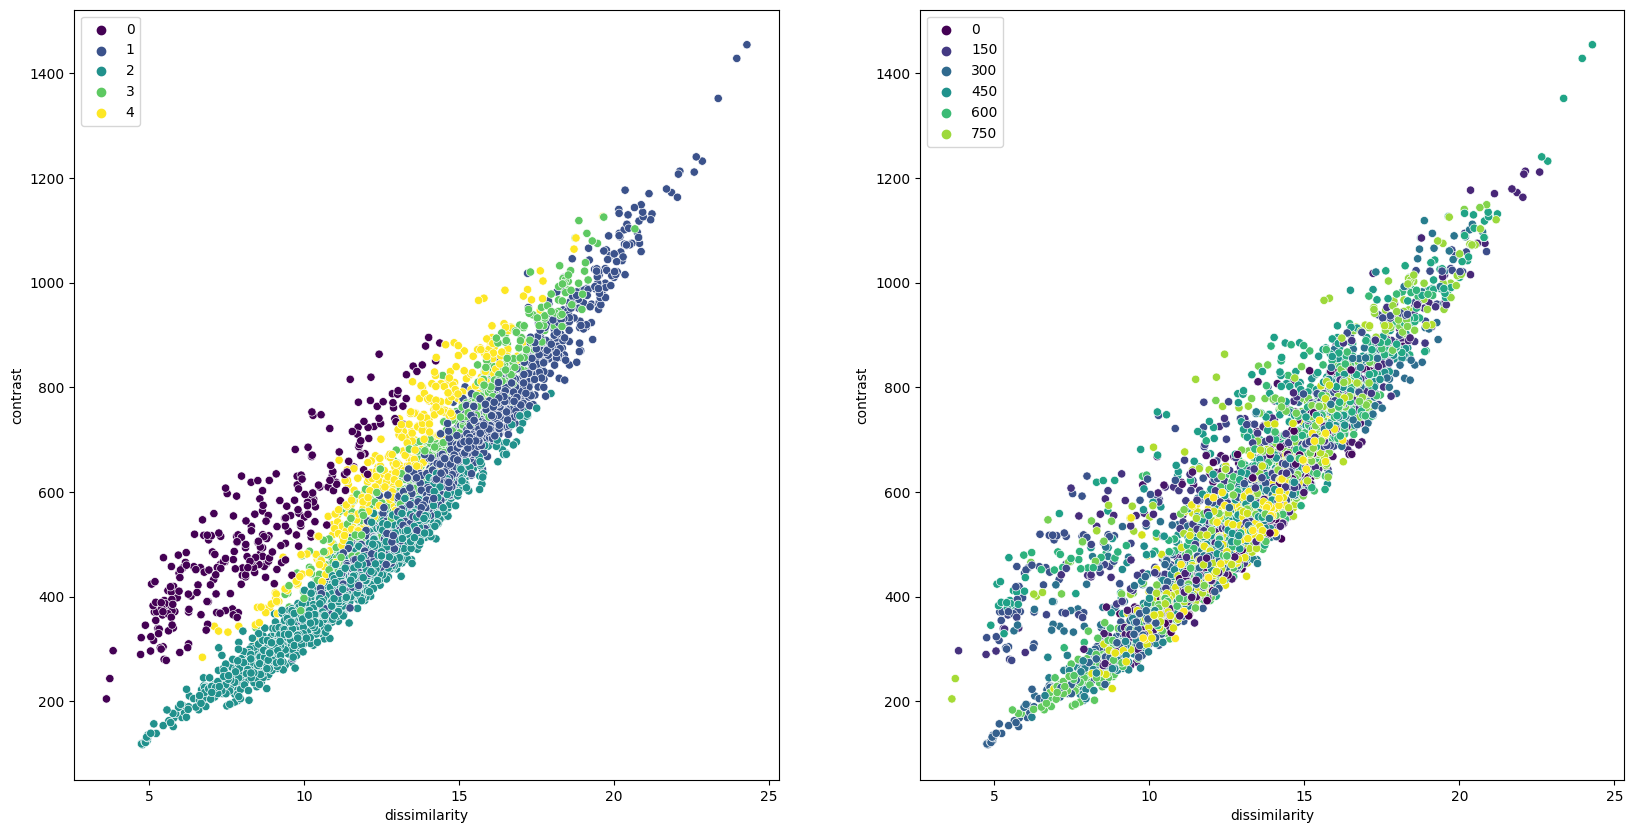

In [58]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x=df['dissimilarity'],y=df['contrast'],hue=labels,palette='viridis')
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['dissimilarity'],y=df['contrast'],hue=labels_af,palette='viridis')


In [59]:
silhouette_avg = silhouette_score(dataset, labels_kmean)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4967299988364259


In [60]:
print(GMM.bic(dataset))

-15000.241830847153


import pickle 

with open('af_model_1.pkl','wb') as f:
    pickle.dump(af,f)

import pickle
with open('gmm_model_2.pkl', 'wb') as f:
    pickle.dump(GMM, f)
with open('kmean_model_2.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [62]:
from preprocessing import image
image_list = image.getFilename(r'C:\Users\ASUS\Documents\NARIT_internship_data\Test_folder')

In [63]:
filetime = []
for file in image_list:
    filetime.append(int(os.path.splitext(os.path.basename(file))[0]))


ValueError: invalid literal for int() with base 10: 'Texture_Feature_Extraction_Methods_A_Survey'

viz = visualizer()
number = 1
source_folder = r'All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-12'
destination_folder = r'C:\Users\ASUS\Documents\NARIT_internship_2024\Tester'

viz.copy_matching_files(df=viz.match_label(df=df,number=number), source_folder=source_folder, destination_folder=destination_folder)

pred = prediction()
path = r'All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-09\638534868144584540.png'
pred_1,pred_2,cloud_percentage,sky_status,final = pred.total_prediction(image_path=path,mask_path='mask_delete_5.png',crop_size=570,kmeans=kmeans,GMM=GMM,df=df)

mask = cv2.imread('mask_delete_5.png',cv2.IMREAD_GRAYSCALE)
mask = crop_center(img=mask,crop_size=570)
img,name = load_single_image(path=path,crop_size=570,mask=mask,apply_crop_sun=False)
image,value,RB = pred.RBsingle(input=img,dataframe=df)
cloud_ratio = pred.CloudRatio(image=img,mask=mask)

import requests
import cv2
import numpy as np
import hashlib
import time

def get_image_hash(image_data):
    return hashlib.md5(image_data).hexdigest()

image_url = "http://weather.narit.or.th/images/allskyimage/ASTROPARK/2024-08-19"
previous_hash = None

while True:
    # Fetch the image from the web
    response = requests.get(image_url)
    if response.status_code == 200:
        # Get the current hash of the image
        current_hash = get_image_hash(response.content)
        
        # Compare with the previous hash
        if current_hash != previous_hash:
            # The image has changed
            print("Image has changed, updating display...")
            image_array = np.frombuffer(response.content, np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
            cv2.imshow('Auto-Updated Image', image)
            
            # Update the previous hash
            previous_hash = current_hash
            
            # Wait for 1 second to avoid rapid flickering
            if cv2.waitKey(1000) & 0xFF == ord('q'):
                break
        else:
            print("No change detected.")
    
    # Check every 10 seconds for a change
    time.sleep(10)
    cv2.destroyAllWindows()
